<a href="https://colab.research.google.com/github/snehanjali410/HDS52150/blob/main/final/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HDS5210**

# **Final Project**

# **2024**

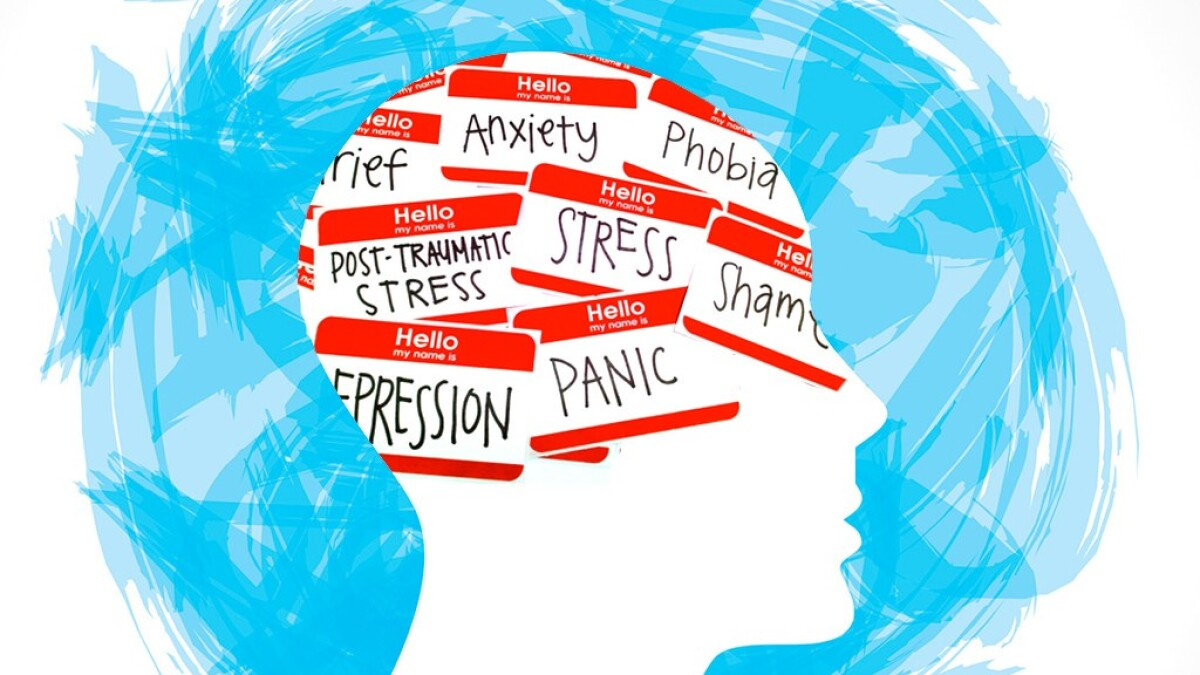

# **Goal**

The goal of this project is to analyze and uncover the sleep patterns and their relationship with profession, gender, and physical activity levels to better understand their impact on sleep health.

# Abstract



Analyzing sleep health involve more than just crunching numbers; rather, in the age of big data, it involves life, color, creativity and a statistical twist to visualization. While working on the Sleep Health and Lifestyle Dataset, it is our goal to unveil meaningful visual correlations between the quality and duration of sleep, and aspects such as employment type, gender, and physical activity.

# Introduction

Sleep is a fundamental aspect of human health, influencing physical, emotional, and cognitive well-being. However, the quality and quantity of sleep can vary significantly across individuals, influenced by factors such as profession, gender, and physical activity levels. Understanding these variations is crucial for improving sleep health and overall quality of life. This project aims to explore and analyze sleep patterns across different professions, genders, and activity levels, highlighting the connections between lifestyle choices and sleep health. By uncovering these relationships, the project seeks to provide valuable insights that can inform better sleep practices and interventions for diverse populations.

# Exploration


The dataset offers a wealth of insights into sleep patterns influenced by profession, gender, and physical activity. Professions, shaping daily routines, may exhibit unique sleep trends, highlighting disparities and guiding occupational interventions. Analyzing the relationship between sleep quality and duration, we aim to uncover whether longer sleep consistently translates to better quality or if subtler dynamics exist. Gender differences in sleep patterns will be explored to provide clarity on which gender experiences better sleep quality and why. Lastly, visualizing the impact of physical activity on sleep will reveal how exercise influences both quality and duration, offering actionable insights through compelling visual representations.

# Datasets

A variety of datasets provide rich insights into the interplay between sleep health, lifestyle behaviors, and overall well-being. The **Behavioral Classes Brazilian Adolescents Dataset**, sourced from Mendeley, focuses on Brazilian adolescents and includes data on physical activity, sedentary behavior, mental health, sleep duration, and alcohol consumption. Updated three months ago, this XLSX dataset offers valuable insights into behavioral patterns and lifestyle factors influencing adolescent well-being.  

The **Sleep Health and Lifestyle Dataset**, available on DataCamp, is a synthetic dataset featuring detailed metrics for nearly 400 fictitious individuals. Updated three months ago, it provides a comprehensive view of variables such as gender, age, occupation, sleep quality, physical activity, stress levels, BMI, cardiovascular indicators (blood pressure and heart rate), daily steps, and sleep disorders.  

Building on this, the **Sleep Health and Lifestyle Data Set (Part 2)** from Kaggle extends the initial dataset with similar variables across 400 rows and 13 columns. Updated just three days ago, it continues to explore the relationships between lifestyle factors and sleep health, providing an up-to-date perspective on this critical aspect of well-being.  

These datasets collectively enable me to analyze patterns and design interventions for improving sleep and lifestyle health. Links to access the datasets include:  

1. [Behavioral Classes Brazilian Adolescents](https://data.mendeley.com/datasets/5rzybst8y3/1)  
2. [Sleep Health and Lifestyle Dataset](https://www.datacamp.com/workspace/datasets/dataset-r-sleep-health)  
3. [Sleep Health and Lifestyle Data Set (Part 2)](https://www.kaggle.com/datasets/caymansmith/sleep-health-and-lifestyle-data-set-part-2)

# Function

In [1]:
def round_columns(df, feature_columns):
    """
    Rounds specified feature columns in a DataFrame to two decimal places.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - feature_columns (list): A list of column names to be rounded.

    Returns:
    - pd.DataFrame: The DataFrame with specified columns rounded to two decimal places.
    """
    # Round specified feature columns to two decimal places
    df[feature_columns] = df[feature_columns].round(2)

    return df

def remove_nan_values(df):
    """
    Removes rows containing NaN values from a DataFrame.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.

    Returns:
    - pd.DataFrame: The DataFrame with NaN values removed.
    """
    # Remove rows with NaN values
    df_without_nan = df.dropna()

    return df_without_nan

def remove_duplicates(df):
    """
    Removes duplicate rows from a DataFrame.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.

    Returns:
    - pd.DataFrame: The DataFrame with duplicate rows removed.
    """
    # Remove duplicate rows based on all columns
    df_without_duplicates = df.drop_duplicates()

    return df_without_duplicates

def drop_columns(df, columns_to_drop):
    """
    Drops specified columns from a DataFrame.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - columns_to_drop (list): A list of column names to be dropped.

    Returns:
    - pd.DataFrame: The DataFrame with specified columns removed.
    """
    # Drop specified columns
    df_dropped = df.drop(columns=columns_to_drop)

    return df_dropped

def common_columns(df1, df2):
    """
    Finds and returns the common columns between two DataFrames.

    Parameters:
    - df1 (pd.DataFrame): The first input DataFrame.
    - df2 (pd.DataFrame): The second input DataFrame.

    Returns:
    - list: A list of common column names.
    """
    common_cols = list(set(df1.columns) & set(df2.columns))
    return common_cols

# Upload, Import and Read

Three datasets were acquired for analysis. The primary dataset from DataCamp was read into a Pandas DataFrame as `df1`. Another dataset from Kaggle, stored in CSV format, was loaded into `df2`. Additionally, an Excel file from Kaggle containing supplementary information was read into `df3`. These datasets provide a diverse set of information for subsequent exploration and analysis.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Specify the file path
datacamp_csv_path = "sleep1.csv"
kaggle_csv_path = "sleep2.csv"
kaggle_excel_path = "BCBA.xlsx"

# Read the CSV file
df1 = pd.read_csv(datacamp_csv_path)
df2 = pd.read_csv(kaggle_csv_path)

# Read the Excel file
df3 = pd.read_excel(kaggle_excel_path)

# Clean & Check

In the process of data transformation and integration, several steps were undertaken to enhance the quality and coherence of the datasets. Initially, categorical labels were harmonized, with the 'Sex' column in df3 being renamed to 'Gender' for consistency. Subsequently, numerical columns underwent precision adjustments, where 'LPA/day(min)', 'Steps/day', 'SB/day(min)', 'BMI', 'WC', and 'WHtR' were rounded to ensure uniformity in data representation.

Additionally, time-related features were standardized, converting the 'SD' column to a more readable time format. To ensure data consistency and aid in further analysis, the 'Stress Level' column was converted to a numerical format.

Furthermore, duplicate rows were removed from df1, df2, and df3 to eliminate redundancy, while NaN values were addressed by removing rows containing missing data. Redundant columns such as 'Weight (kg)' and 'Height (m)' in df3 were dropped since the 'BMI' column already encapsulates this information.

For the integration phase, common columns between df3 and the concatenated data of df1 and df2 were identified, and an outer join was performed. The resulting merged dataset, denoted as 'df', encapsulates a comprehensive view of the integrated information from the original datasets.

These transformations and integrations were executed to enhance the overall data quality, consistency, and readiness for subsequent analysis.

In [3]:
df1.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
df2.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
1,375,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
2,376,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
3,377,Male,29,Doctor,6.1,6,30,8,Normal,120/80,70,8000,NaN
4,378,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


In [5]:
df3.head()

,IC,Sex,Age,Grade,Class_SES,LPA/day(min),MVPA/day(min),Steps/day,SB/day(min),ST,...,BMI,SBP,DBP,WC,HW,WHtR,Alcohol,Tobacco,CMD,LCA
0,1,1,16,2,2,198.571429,48.357,7173.428571,737.821429,9.0,...,25.317739,112.5,54.5,85.60,104.80,0.497674,2,1,10,2
1,2,1,18,3,2,173.464286,52.321,6765.714286,765.642857,5.0,...,23.558253,103.0,55.0,81.80,102.60,0.468231,1,1,9,2
2,3,2,17,3,1,128.250000,33.000,5010.428571,839.214286,6.0,...,19.914403,101.5,56.5,69.75,96.00,0.434579,2,2,7,3
3,4,1,16,2,2,86.107143,37.607,4053.428571,773.428571,3.5,...,26.805030,95.0,50.0,101.65,102.10,0.590988,2,1,3,2
4,5,2,15,1,3,146.708333,71.917,8256.166667,747.083333,4.5,...,20.851368,99.0,53.5,73.45,95.35,0.450613,1,1,3,2


In [6]:
df3.rename(columns={'Sex': 'Gender'}, inplace=True)

In [7]:
# Round 'LPA/day(min)' column to two decimal places in DataFrame
df3 = round_columns(df3, 'LPA/day(min)')

In [8]:
# Round 'Steps/day' and 'SB/day(min)' columns to two decimal places
df3 = round_columns(df3, 'Steps/day')
df3 = round_columns(df3, 'SB/day(min)')

# Round 'BMI' and 'WC' column to two decimal places
df3 = round_columns(df3, 'BMI')
df3 = round_columns(df3, 'WC')

# Round 'WHtR' column to three decimal places
df3['WHtR'] = df3['WHtR'].round(3)

In [9]:
df3['SD'] = pd.to_datetime(df3['SD'], format='%H:%M:%S').dt.strftime('%H:%M')

In [10]:
df1.info() # for empty and type of values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [11]:
df2.info() # for empty and type of values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                186 non-null    int64  
 1   Gender                   186 non-null    object 
 2   Age                      186 non-null    int64  
 3   Occupation               186 non-null    object 
 4   Sleep Duration           186 non-null    float64
 5   Quality of Sleep         186 non-null    int64  
 6   Physical Activity Level  186 non-null    int64  
 7   Stress Level             186 non-null    int64  
 8   BMI Category             186 non-null    object 
 9   Blood Pressure           186 non-null    object 
 10  Heart Rate               186 non-null    int64  
 11  Daily Steps              186 non-null    int64  
 12  Sleep Disorder           30 non-null     object 
dtypes: float64(1), int64(7), object(5)
memory usage: 19.0+ KB


In [12]:
df3.info() # for empty and type of values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   IC             217 non-null    int64  
 1   Gender         217 non-null    int64  
 2   Age            217 non-null    int64  
 3   Grade          217 non-null    int64  
 4   Class_SES      217 non-null    int64  
 5   LPA/day(min)   217 non-null    float64
 6   MVPA/day(min)  217 non-null    float64
 7   Steps/day      217 non-null    float64
 8   SB/day(min)    217 non-null    float64
 9   ST             217 non-null    float64
 10  SD             217 non-null    object 
 11  Weight (kg)    217 non-null    float64
 12  Height (m)     217 non-null    float64
 13  BMI            217 non-null    float64
 14  SBP            217 non-null    float64
 15  DBP            217 non-null    float64
 16  WC             217 non-null    float64
 17  HW             217 non-null    float64
 18  WHtR      

In [13]:
# Convert 'Stress Level' to float in DataFrame's
df1['Stress Level'] = df1['Stress Level'].astype(float)
df2['Stress Level'] = df2['Stress Level'].astype(float)

In [14]:
# Remove duplicate rows from DataFrame df1
df1 = remove_duplicates(df1)

# Remove duplicate rows from DataFrame df2
df2 = remove_duplicates(df2)

# Remove duplicate rows from DataFrame df3
df3 = remove_duplicates(df3)


In [15]:
# Remove rows with NaN values from DataFrame df1
df1 = remove_nan_values(df1)

# Remove rows with NaN values from DataFrame df2
df2 = remove_nan_values(df2)

# Remove rows with NaN values from DataFrame df3
df3 = remove_nan_values(df3)


In [16]:
# Because we have the 'BMI' column, we can drop the 'Weight (kg)' column from DataFrame df3
df3 = drop_columns(df3, 'Weight (kg)')

# Because we have the 'BMI' column, we can drop the 'Height (m)' column from DataFrame df3
df3 = drop_columns(df3, 'Height (m)')

In [17]:
# Find and print common columns between df1 and df2
common_cols_list_1 = common_columns(df1, df2)
print("Common Columns between df1 and df2:", common_cols_list_1)

# Find and print common columns between df1 and df3
common_cols_list_2 = common_columns(df1, df3)
print("Common Columns between df1 and df3:", common_cols_list_2)

# Find and print common columns between df2 and df3
common_cols_list_3 = common_columns(df2, df3)
print("Common Columns between df2 and df3:", common_cols_list_3)

Common Columns between df1 and df2: ['Age', 'Quality of Sleep', 'Physical Activity Level', 'Daily Steps', 'Blood Pressure', 'Person ID', 'Heart Rate', 'BMI Category', 'Sleep Disorder', 'Gender', 'Sleep Duration', 'Occupation', 'Stress Level']
Common Columns between df1 and df3: ['Age', 'Gender']
Common Columns between df2 and df3: ['Age', 'Gender']


In [18]:
sex_mapping = {1: 'Male', 2: 'Female'}

# Replace 'Gender' column values in df1
df3['Gender'] = df3['Gender'].replace(sex_mapping)

In [19]:
# Concatenate the two DataFrames vertically based on their indices
concatenated_data = pd.concat([df1, df2], axis=0, ignore_index=True)

In [20]:
# Merge using 'outer' join
merged_data_outer = pd.merge(df3, concatenated_data, on=common_cols_list_2, how='outer')

In [21]:
# Create a deep copy of the DataFrame merged_data_outer and assign it to a new DataFrame df
df = merged_data_outer.copy()


# Full analyses

My project revolves around crafting visual narratives from the Sleep Health and Lifestyle Dataset. Utilizing tools such as heatmaps, scatter plots, and interactive dashboards, we will bring the data to life. Advanced statistical analyses, including correlation analyses, will complement these visualizations, ensuring that our insights are not only visually appealing but also rigorously supported by statistical evidence.

By blending the art of visualization with the precision of advanced statistical analyses, this study aims to demystify the complexities of sleep health and lifestyle, presenting a narrative that is both accessible and scientifically robust.

My Aim is:
1. Visualize the distribution of sleep quality among different professions.
2. Create visual representations to explore the relationship between sleep quality and duration.
3. Employ advanced statistical analyses for visually compelling gender-specific sleep quality comparisons.
4. Develop visualizations to illustrate the impact of physical activity on both sleep quality and duration.

In [22]:
df.columns

Index(['IC', 'Gender', 'Age', 'Grade', 'Class_SES', 'LPA/day(min)',
       'MVPA/day(min)', 'Steps/day', 'SB/day(min)', 'ST', 'SD', 'BMI', 'SBP',
       'DBP', 'WC', 'HW', 'WHtR', 'Alcohol', 'Tobacco', 'CMD', 'LCA',
       'Person ID', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')

In [23]:
df.nunique().sort_values()

,0
Sleep Disorder,2
Gender,2
Tobacco,2
Alcohol,2
LCA,3
Grade,3
Class_SES,3
BMI Category,4
Quality of Sleep,6
Stress Level,6


It is evident that both continuous and categorical variables are present here, along with the absence of null values.
* Person ID: An identifier for each individual.
* Gender: The gender of the person (Male/Female).
* Age: The age of the person in years.
* Occupation: The occupation or profession of the person.
* Sleep Duration (hours): The number of hours the person sleeps per day.
* Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.
* Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.
* Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.
* BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).
* Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.
* Heart Rate (bpm): The resting heart rate of the person in beats per minute.
* Daily Steps: The number of steps the person takes per day.
* Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

In [24]:
# For statistical info
df.describe().style.background_gradient(cmap='BuPu') #for colored output

,IC,Age,Grade,Class_SES,LPA/day(min),MVPA/day(min),Steps/day,SB/day(min),ST,BMI,SBP,DBP,WC,HW,WHtR,Alcohol,Tobacco,CMD,LCA,Person ID,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,217.000000,402.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,109.000000,29.495025,1.903226,1.889401,147.644562,53.504014,7126.262396,756.530507,6.602857,22.329724,104.682028,57.785714,78.433180,98.429263,0.465304,1.838710,1.327189,5.520737,1.949309,283.562162,6.798919,6.772973,58.772973,5.827027,72.075676,6591.891892
std,62.786676,15.596733,0.807854,0.606086,33.534417,20.355731,2032.628598,59.847037,3.392228,4.508465,11.503735,6.328867,11.141232,9.126904,0.066463,0.368649,0.470272,3.779916,0.715058,124.352443,0.741839,1.344200,20.334494,1.880196,5.307368,1868.558265
min,1.000000,15.000000,1.000000,1.000000,65.250000,20.036000,3435.500000,571.210000,1.330000,15.150000,75.000000,43.500000,59.200000,82.750000,0.342000,1.000000,1.000000,0.000000,1.000000,4.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,55.000000,16.000000,1.000000,2.000000,119.960000,37.893000,5564.430000,718.380000,4.000000,19.310000,96.000000,53.500000,70.800000,92.150000,0.420000,2.000000,1.000000,3.000000,1.000000,222.000000,6.300000,6.000000,45.000000,4.000000,68.000000,6000.000000
50%,109.000000,17.000000,2.000000,2.000000,149.000000,48.821000,6872.860000,755.920000,5.500000,21.170000,104.000000,57.000000,75.600000,96.750000,0.449000,2.000000,1.000000,5.000000,2.000000,274.000000,6.500000,6.000000,45.000000,7.000000,72.000000,6000.000000
75%,163.000000,44.000000,3.000000,2.000000,169.540000,66.893000,8436.500000,799.430000,8.000000,24.300000,113.000000,62.500000,84.150000,102.450000,0.498000,2.000000,2.000000,9.000000,2.000000,356.000000,7.300000,8.000000,75.000000,7.000000,75.000000,7000.000000
max,217.000000,59.000000,3.000000,3.000000,265.210000,126.786000,13989.570000,900.960000,20.000000,41.670000,137.500000,76.000000,133.400000,133.250000,0.783000,2.000000,2.000000,12.000000,3.000000,559.000000,8.300000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [25]:
df.pivot_table(index='Quality of Sleep',columns='Sleep Disorder',values='Sleep Duration',aggfunc='mean').style.background_gradient(cmap='BuPu')

Sleep Disorder,Insomnia,Sleep Apnea
Quality of Sleep,,
4.000000,5.900000,5.833333
5.000000,6.500000,6.500000
6.000000,6.371053,6.152778
7.000000,6.643243,7.500000
8.000000,7.450000,7.280000
9.000000,8.300000,8.096970


People with good quality sleep tend to sleep longer regardless of sleep disorder.

## Correlation

In [26]:
# Convert BMI Category to Categorical dtype
df['BMI Category'] = df['BMI Category'].astype('category')

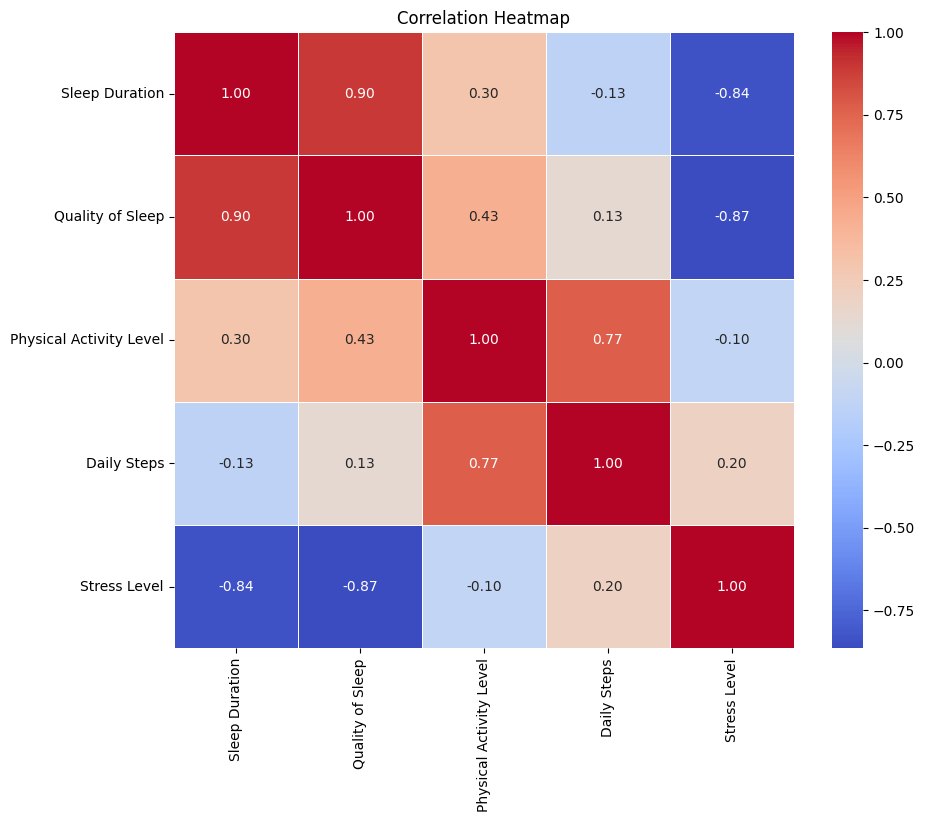

In [27]:
selected = ['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Daily Steps', 'Stress Level']
subset_df = df[selected]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Create a heatmap for visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

* **Sleep duration and quality of sleep are strongly positively correlated.** This means that people who get more sleep tend to have better quality sleep, and vice versa.
* **Physical activity level is moderately positively correlated with both sleep duration and quality of sleep.** This means that people who are more active tend to get more sleep and have better quality sleep.
* **Daily steps are weakly positively correlated with sleep duration and quality of sleep.** This means that there is a small but positive relationship between the number of steps you take each day and how well you sleep.
* **Stress level is strongly negatively correlated with both sleep duration and quality of sleep.** This means that people who are more stressed tend to get less sleep and have poorer quality sleep.

Overall, the heatmap suggests that there is a strong positive relationship between sleep duration, quality of sleep, and physical activity level. This means that getting regular exercise and getting enough sleep can help you to improve your overall health and well-being.


## The effect of occupation on your sleep

In [28]:
jobs= df['Occupation'].unique()
jobs

array([nan, 'Sales Representative', 'Software Engineer', 'Nurse',
       'Teacher', 'Doctor', 'Scientist', 'Lawyer', 'Accountant',
       'Engineer', 'Salesperson'], dtype=object)

In [29]:
subset_df_1 = concatenated_data[['Sleep Disorder', 'Occupation']]

fig = px.treemap(subset_df_1, path=[px.Constant('jobs'), 'Sleep Disorder', 'Occupation'],
                 color='Sleep Disorder',
                 color_discrete_sequence=['#EBDEF0', '#C39BD3', '#4A235A'])

fig.update_layout(title='<b>The effect of occupation on your sleep</b>',
                  title_font={'size': 20})

fig.show()


**Normal Sleep:**

* **Doctors** having the highest percentage of normal sleep could be due to several factors, such as having more control over their schedules, being less likely to experience shift work, or having lower levels of stress compared to other occupations.

**Insomnia:**

* **Salespeople** having the highest percentage of insomnia could be due to factors such as high levels of stress, long working hours, or irregular schedules. Salespeople may also be more susceptible to anxiety and worry, which can contribute to insomnia.

**Sleep Apnea:**

* **Nurses** having the highest percentage of sleep apnea could be due to several factors, including shift work, exposure to loud noises, and high levels of stress. Nurses may also be more likely to be overweight or obese, which are risk factors for sleep apnea.



## The effect of age on sleep

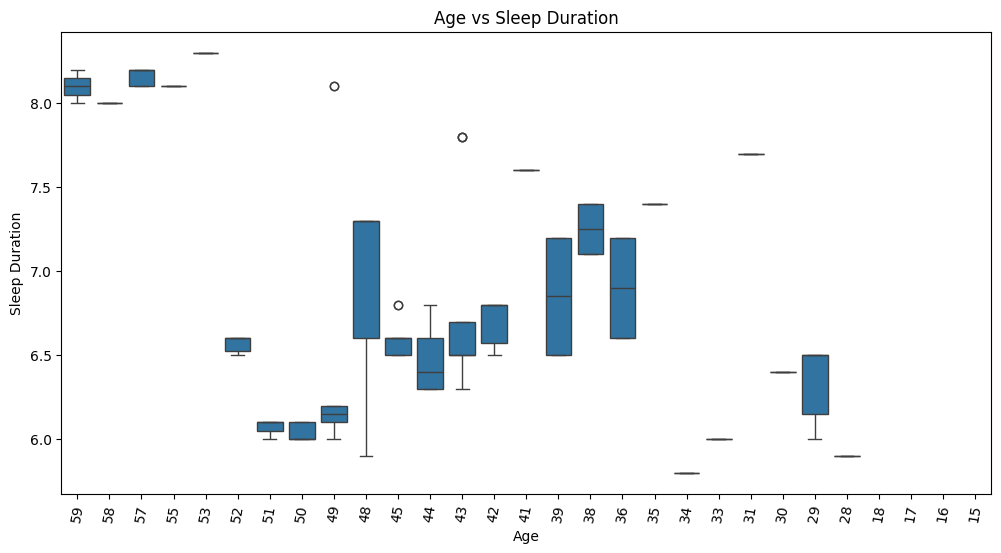

In [30]:
# Relationship between the age and the sleep duration

age_box = df.loc[df.Age.isin(df.index)]
ordered_labels = df.groupby('Age').Age.median().sort_values(ascending=False).index.values

fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(data=df, x="Age", y="Sleep Duration", order=ordered_labels, ax=ax)
plt.xticks(rotation = 80)
plt.xlabel('Age')
plt.ylabel('Sleep Duration')
plt.title('Age vs Sleep Duration')
plt.show()

In [31]:
fig=px.ecdf(df,x='Age',
            color='Sleep Disorder')


fig.update_layout(title='<b>The effect of age on sleep </b>..',
                 title_font={'size':25})


fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

* Overall, the probability of having a sleep disorder increases with age. This is true for all three sleep disorders shown: none, insomnia, and sleep apnea.
* The probability of having insomnia increases more rapidly with age than the probability of having none or sleep apnea. This means that older adults are more likely to experience insomnia than younger adults, while the rates of none and sleep apnea increase more gradually with age.
* The probability of having sleep apnea starts to increase at a younger age than the probability of having none or insomnia. This suggests that sleep apnea may be more common in middle-aged adults than the other two sleep disorders.
* By age 60, about 40% of people have a sleep disorder.
* The probability of having no sleep disorder is highest in people in their 20s and 30s.

## BMI Category vs Sleep Disorder

<ipython-input-32-009d1ce76df4>:1: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



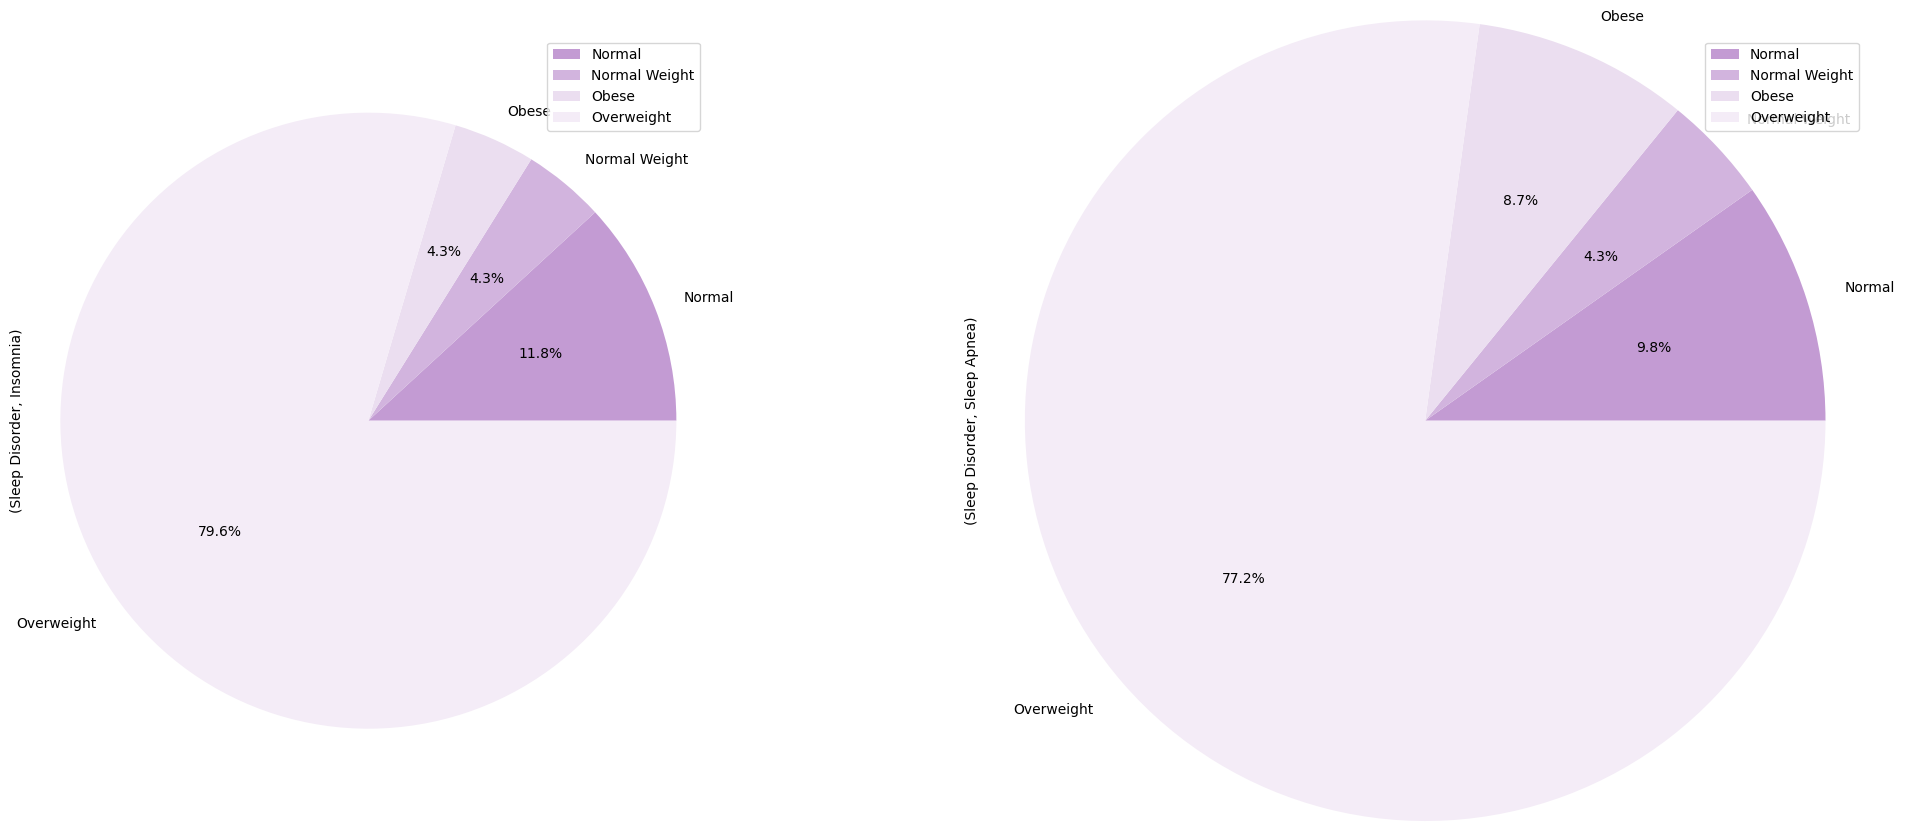

In [32]:
df.pivot_table(index='BMI Category',columns='Sleep Disorder',aggfunc={'Sleep Disorder':'count'}).plot.pie(autopct ='%1.1f%%',
                                                                                                                  subplots=True,figsize=(25,10),
                                                                                                                  colors=['#C39BD3','#D2B4DE','#EBDEF0','#F4ECF7'])

plt.axis('equal')
plt.show()


* People who are overweight are the most likely to have sleep apnea, at 79.6%. This is more than double the percentage of people with normal weight who have sleep apnea (4.3%).
* People who are normal weight are the most likely to have no sleep disorder, at 85%. This is significantly higher than the percentage of people with overweight or obese weight who have no sleep disorder.
* People who are obese are the most likely to have insomnia, at 77.2%. This is more than double the percentage of people with normal weight who have insomnia (4.3%).

## BMI Category, Quality of Sleep, Daily Steps and Stress Level

In [33]:
df.groupby('BMI Category')[['Quality of Sleep','Daily Steps','Stress Level']].mean()

<ipython-input-33-5ad1a460abf6>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Quality of Sleep,Daily Steps,Stress Level
BMI Category,,,
Normal,7.550000,7350.000000,5.400000
Normal Weight,5.000000,4050.000000,7.000000
Obese,6.500000,3341.666667,5.583333
Overweight,6.786207,6896.551724,5.841379




Examining BMI, sleep quality, and stress levels reveals interesting patterns. Normal BMI individuals generally have higher sleep quality and lower stress. Overweight individuals, despite high daily steps, show elevated stress and intermediate sleep quality. Obese individuals experience lower sleep quality with higher stress and fewer daily steps. BMI, influenced by diet, is excluded from regression analysis for a focused examination of relevant factors.

## Gender, Quality of Sleep, and Sleep Duration

In [34]:
df.groupby('Gender')[['Quality of Sleep','Sleep Duration']].mean()

,Quality of Sleep,Sleep Duration
Gender,,
Female,7.050847,6.874576
Male,6.283582,6.665672




while the variance in sleep duration between males and females is minimal, there appears to be a trend suggesting that males may experience lower sleep quality compared to females, even with similar sleep durations.

## Physical Activity & Stress Level vs Quality of Sleep

In [35]:
subset_df_2 = df.groupby('Quality of Sleep')[['Physical Activity Level','Stress Level']].mean()

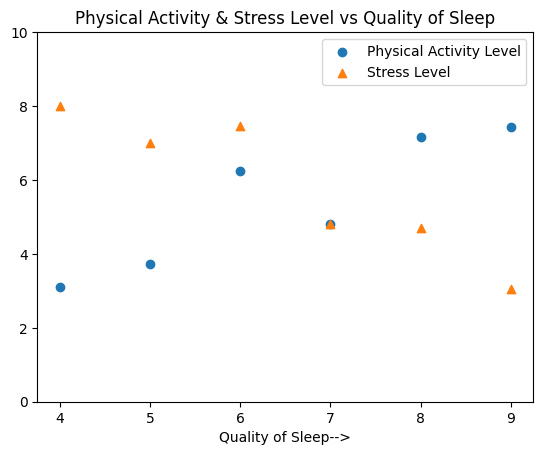

In [36]:
ax = plt.subplot(1,1,1)
x = subset_df_2.index

ax.scatter(x,subset_df_2['Physical Activity Level'].to_numpy()/10,marker='o')
ax.scatter(x,subset_df_2['Stress Level'].to_numpy(),marker='^')
ax.set_xlabel('Quality of Sleep-->')

plt.ylim(0,10)
plt.title('Physical Activity & Stress Level vs Quality of Sleep')
plt.legend(['Physical Activity Level','Stress Level'])
plt.show()


Examining the scatter diagram, we observe a compelling relationship: as the level of physical activity increases, stress levels tend to decrease, and concurrently, the quality of sleep improves. This implies a noteworthy inverse correlation between physical activity level and stress level. Furthermore, there is a positive correlation between physical activity and sleep quality, while stress level demonstrates a negative correlation with sleep quality. This underscores the intricate interplay between lifestyle factors, emphasizing the potential benefits of higher physical activity levels on both stress reduction and improved sleep quality.

# Conclusion



The complex approach of the project enlightens several aspects associated with the quality and quantity of sleep and lifestyle parameters. Major observations include the positive relationship between sleep duration and sleep quality with regard to sufficient sleep to enhance sleep quality. Physical activity stands out again as a positive predictor which correlates moderately with the hours of sleep and sleep quality. In addition, weak positive correlations are detected between daily steps and sleep metrics, which are better illustrated using the trend graph below.

Stress levels perform a significant negative association with the duration and quality of sleep. This re-emphasizes the importance of stressing on stress management in order to gain healthier sleep.

Occupational analysis show distinct patterns in which doctors had higher percentiles in normal sleep, sales people higher percentile in insomnia and nurses higher percentile in sleep apnea. Trends based on age show a likelihood of sleep disorders, of which insomnia is most common, rising as people age.

BMI specific aspects for considerations demonstrate unique sleep patterns. Normal BMI people sleep better, experience less stress than overweight people, though the latter take more daily steps. People with obesity have worse sleep quality, and stress follows the convenient positive association between BMI, stress, and sleep quality.

Sex-related observations signal a possible problem, that though people’s total sleep time is approximately equal, males can have poorer sleep quality than females.

In conclusion, this project unravels the multifaceted relationships between sleep, lifestyle factors, and demographics. The findings emphasize the interconnected nature of physical activity, stress, and sleep health, providing valuable insights for individuals and healthcare professionals aiming to enhance overall well-being.

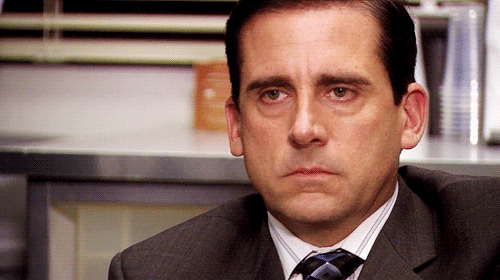

# **Sleep well and worry less**